In [70]:
#!pip install openai
#!pip install stability-sdk
import io
import os
import warnings
import openai
import getpass, os
from IPython.display import display
from PIL import Image
from stability_sdk import client
import stability_sdk.interfaces.gooseai.generation.generation_pb2 as generation


In [71]:
def chatGPT(text):
    response = openai.Completion.create(
        model="text-davinci-003",prompt=text,temperature=0,max_tokens=100,top_p=1,frequency_penalty=0.0,
        presence_penalty=0.0,
        stop=["**"])
    return response

os.environ['STABILITY_HOST'] = 'grpc.stability.ai:443'
# To get your API key, visit https://beta.dreamstudio.ai/membership
os.environ['STABILITY_KEY'] = getpass.getpass('Enter your API Key')

openai.api_key = getpass.getpass('Enter your OpenAI API Key') #get it from here https://openai.com/blog/openai-api

In [75]:
input='Today I am thinking a lot about my life and sometimes I would like to understand how infinite the universe is and what the meaning of life truly is. Can you write a short paragraph describing the meaning of life?'
output=chatGPT(input)
output_clean=response['choices'][0]['text'].replace('\n','')

paint_style='kawaii manga cute takashi murakami'


In [76]:
print('ChatGPT says: '+output_clean)

ChatGPT says: The meaning of life is a complex and ever-evolving concept that is unique to each individual. It is a journey of self-discovery and growth, of learning and understanding, of connecting with others and finding joy in the little things. Life is about living in the present moment, appreciating the beauty of the world around us, and striving to make a positive impact on the lives of those around us. Ultimately, the meaning of life is to find our own purpose and to live


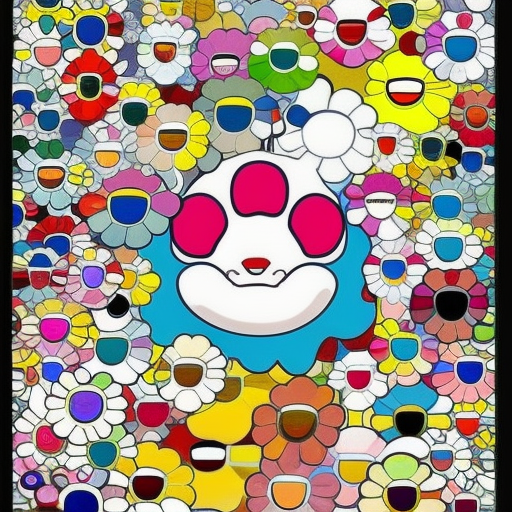

In [78]:
# Stable Diffusion

stability_api = client.StabilityInference(
    key=os.environ['STABILITY_KEY'], 
    verbose=True,
)
# the object returned is a python generator
answers = stability_api.generate(
    prompt='create a painting in the style of '+paint_style+' that shows the '+text,
    seed=34567, # if provided, specifying a random seed makes results deterministic
    steps=20, # defaults to 30 if not specified
)

# iterating over the generator produces the api response
for resp in answers:
    for artifact in resp.artifacts:
        if artifact.finish_reason == generation.FILTER:
            warnings.warn(
                "Your request activated the API's safety filters and could not be processed."
                "Please modify the prompt and try again.")
        if artifact.type == generation.ARTIFACT_IMAGE:
            img = Image.open(io.BytesIO(artifact.binary))
            display(img)